In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [54]:
df = pd.read_csv('breast cancer.csv')
print(df.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

# Data Preprocessing

In [55]:
df.drop(columns=['id'], inplace=True)
print(df.head())

  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33 

In [56]:
print(df.isnull().sum())

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [57]:
l_encoder = LabelEncoder()

In [58]:
df['diagnosis'] = l_encoder.fit_transform(df['diagnosis'])

In [59]:
X = df.drop(columns =['diagnosis'])
y = df['diagnosis']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [61]:
scaler = StandardScaler()

In [62]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Implement K-NN Algo

In [63]:
k = KNeighborsClassifier(n_neighbors=7)
k.fit(X_train, y_train)
y_pred = k.predict(X_test)

# Model Evalution

In [64]:
acc = accuracy_score(y_test, y_pred)
pr = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Acc: {acc:.4f}")
print(f"Pre: {pr:.4f}")
print(f"Rec: {rec:.4f}")
print(f"F1: {f1:.4f}")
print(np.unique(y_pred, return_counts=True))

Acc: 0.9474
Pre: 0.9302
Rec: 0.9302
F1: 0.9302
(array([0, 1]), array([71, 43], dtype=int64))


In [65]:
print(np.unique(y_pred))

[0 1]


In [66]:
k_val = range(1, 21)
accuracies = []

In [67]:
for kn in k_val:
    k = KNeighborsClassifier(n_neighbors=7)
    k.fit(X_train, y_train)
    y_pred = k.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

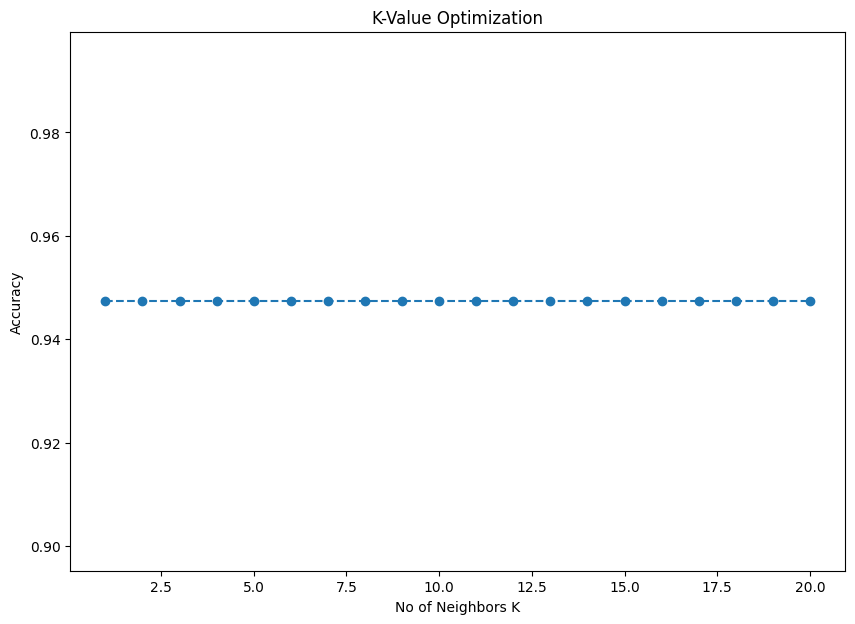

In [68]:
plt.figure(figsize=(10, 7))
plt.plot(k_val, accuracies, marker='o', linestyle='dashed')
plt.xlabel('No of Neighbors K')
plt.ylabel('Accuracy')
plt.title('K-Value Optimization')
plt.show()

# Test Model with New Data 

In [69]:
new_data = np.array([[15, 20, 80, 500, 0.1, 0.2, 0.3, 0.1, 0.2, 0.15, 0.2, 0.5, 2.5, 20.5, 300, 0.05, 0.1, 0.15, 0.05, 0.1,17, 22, 90, 600, 0.12, 0.22, 0.32, 0.12, 0.22, 0.18]])
new_data_df = pd.DataFrame(new_data, columns = X.columns)
new_data_sca = scaler.transform(new_data_df)
predi=k.predict(new_data_sca)
print("Prediction:", "Maligant" if predi[0] == 1 else "Bengin")

Prediction: Bengin
